# Light Data Exploration on Titanic

## A. Importing and Creating DataFrame and Fixing Missing Values

In [1]:
import pandas as pd
import seaborn as sns
import math as math
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
%matplotlib inline


In [7]:
clean_titan_df = pd.read_csv('../data/clean_titan_df.csv')

In [8]:
clean_titan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   PassengerId  891 non-null    int64  
 2   Survived     891 non-null    int64  
 3   Pclass       891 non-null    int64  
 4   Name         891 non-null    object 
 5   Sex          891 non-null    object 
 6   Age          891 non-null    float64
 7   SibSp        891 non-null    int64  
 8   Parch        891 non-null    int64  
 9   Ticket       891 non-null    object 
 10  Fare         891 non-null    float64
 11  Cabin        204 non-null    object 
 12  Embarked     889 non-null    object 
 13  Titles       891 non-null    object 
 14  AgeBracket   891 non-null    object 
 15  Status       891 non-null    object 
dtypes: float64(2), int64(6), object(8)
memory usage: 111.5+ KB


## B. TABLE & VISUALIZATION

<AxesSubplot:xlabel='Pclass', ylabel='count'>

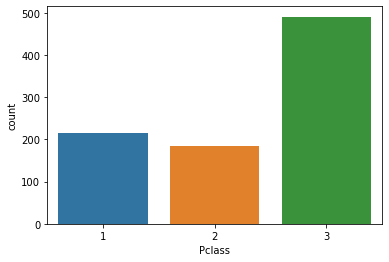

In [9]:
# -------------------------------
# Overview of number of passengers in each class
# -------------------------------
# shows the frequency of each Pclass using Bargraph (or countplot)
# The most number of passengers are distributed on the 3rd class

sns.countplot(x="Pclass", data=clean_titan_df)


In [10]:
# Shows the number of passengers in each class for both who survived and not

clean_titan_df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
# Total number of those who survived  in each variable
clean_titan_df[clean_titan_df['Survived']==1].count()

Unnamed: 0     342
PassengerId    342
Survived       342
Pclass         342
Name           342
Sex            342
Age            342
SibSp          342
Parch          342
Ticket         342
Fare           342
Cabin          136
Embarked       340
Titles         342
AgeBracket     342
Status         342
dtype: int64

In [12]:
# Total number of those who did not survive in each variable
clean_titan_df[clean_titan_df['Survived']==0].count()

Unnamed: 0     549
PassengerId    549
Survived       549
Pclass         549
Name           549
Sex            549
Age            549
SibSp          549
Parch          549
Ticket         549
Fare           549
Cabin           68
Embarked       549
Titles         549
AgeBracket     549
Status         549
dtype: int64

In [13]:
# Sum of all who survived

clean_titan_df['Survived'].sum()

342

In [27]:
# Survival rate

clean_titan_df['Survived'].mean()

0.3838383838383838

The calculation above only shows that there are 38% who survived.

In [28]:
# we can group data by class and view the averages for each column

df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


### Survival Rate and Passenger Class

1 represents those who survived.  
It can be observed that there are more Class 1 (blue bar) who survived when compared to those Class 1 who died.

0 represents those who died.  The least least survival rate belongs to Class 3 (green bar) when compared to Class 3 who survied

<AxesSubplot:xlabel='Survived', ylabel='count'>

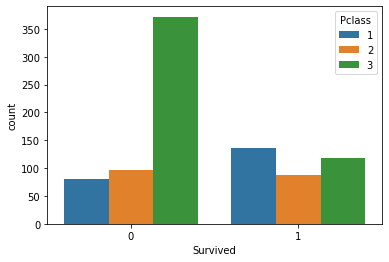

In [29]:
sns.countplot(x='Survived', data=clean_titan_df, hue='Pclass')

Shows the survival rate per passenger class

In [30]:
clean_titan_df.groupby('Pclass').mean()['Survived']


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

63% survival rate for Class 1, 47% for class 2 and 24% for class 3.  This shows us that survival rate is higher in class 1 than in class 2 or 3.  So, the better standing of class you are, the higher your probability of survival.

Let's translate the mean values of survival rate for the Passenger Clas (Pclass) using the bar graph below.

<AxesSubplot:xlabel='Pclass'>

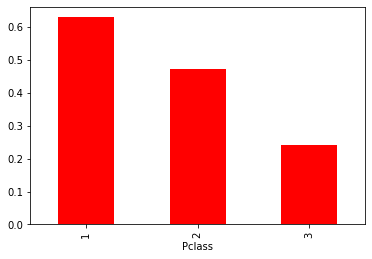

In [31]:

clean_titan_df.groupby('Pclass').mean()['Survived'].plot.bar(
    width=0.5,
    color='red'
)

<AxesSubplot:>

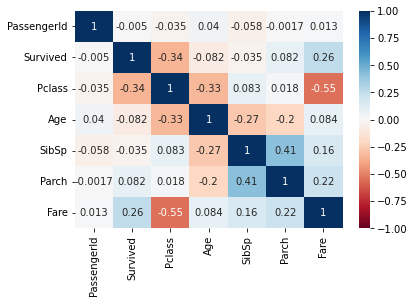

In [32]:
# Heatmap for all numerical variables
# Pclass and survival rate plotting
# Survival and Pclass are negatively correlated with one another (-0.34). The lower the class (the richer you are), the higher your survival rate (0 lowest, 1 highest) is
# Survival and Fare are positively correlated with one another (0.26). The higher the fare is paid, the greater chances of surviving.
sns.heatmap(clean_titan_df.corr(), 
            cmap="RdBu", 
            annot=True, 
            center=0, 
            vmin=-1, 
            vmax=1
           )


In [33]:
# Correlation and p-value of 'Survived' and P-class
# Survival is negatively correlated to the Passenger class, with correlation coefficient (r) of -0.34 
# There is a less likelihood that this has happened by chance based on its p-value of 0 
# We reject the null hypothesis, and accept the alternative hypothesis that these variables are associated 
# .. with one another.

r, p = stats.pearsonr(clean_titan_df.Survived, clean_titan_df.Pclass)
print("Correlation between Survived and Pclass: {}".format(round(r, 2)))
print("P-value of Survived and Pclass: {}".format(round(p, 2)))

Correlation between Survived and Pclass: -0.34
P-value of Survived and Pclass: 0.0


In [34]:
# Correlation and p-value of 'Survived' and P-class
# Survival is positively correlated to the Fare, with correlation coefficient (r) of 0.26 
# There is a less likelihood that this has happened by chance based on its p-value of 0 
# We reject the null hypothesis, and accept the alternative hypothesis that these variables are associated 
# .. with one another.

r, p = stats.pearsonr(clean_titan_df.Survived, clean_titan_df.Fare)
print("Correlation between Survived and Pclass: {}".format(round(r, 2)))
print("P-value of Survived and Pclass: {}".format(round(p, 2)))

Correlation between Survived and Pclass: 0.26
P-value of Survived and Pclass: 0.0


In [35]:
# Shows the mean (from 0 to 1) survival rate for each Class
# Class 1 has the highest survival rate, followed by class 2, then class 1

print(clean_titan_df[['Pclass','Survived']].groupby('Pclass').mean())

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


### General view of survival rate on Sex, Pclass and mean of Age

In [36]:
print(clean_titan_df.groupby(['Survived', 'Sex', 'Pclass'])['Age'].agg(['mean', 'median']).round(1))

                        mean  median
Survived Sex    Pclass              
0        female 1       25.7    25.0
                2       36.0    32.5
                3       24.4    23.0
         male   1       42.0    39.0
                2       33.3    32.0
                3       28.4    32.0
1        female 1       34.4    33.0
                2       28.1    28.5
                3       22.8    26.0
         male   1       35.8    35.0
                2       17.9     8.0
                3       22.9    26.0


In [37]:
# There are two codes that work here. You can choose anything between the two:

#clean_titan_df.groupby('Pclass')['Age'].agg(['mean']).round(2)

clean_titan_df.groupby('Pclass').mean()['Age'].round(0)

Pclass
1    37.0
2    30.0
3    27.0
Name: Age, dtype: float64

Based on this data, we can also see that the lower the class is, the older the passengers are.
Class 1 is much more composed by an average of 37-year-olds, Class 2 of 30-year-olds, and class 3 of 27-year-olds.  This can be visualized by the graph below.

Text(0, 0.5, 'Age')

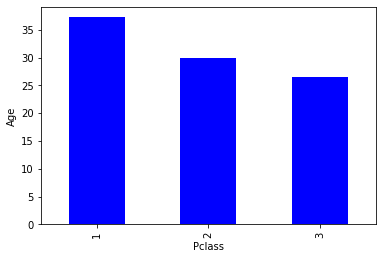

In [38]:
clean_titan_df.groupby(['Pclass']).mean()['Age'].plot.bar(
    width=0.5,
    color='blue'
)
plt.ylabel("Age")

### Survival Rate and (Sex and Passenger Class and Fare)

<AxesSubplot:xlabel='Survived', ylabel='count'>

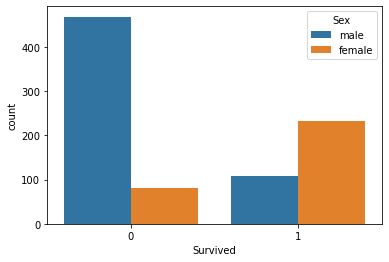

In [39]:

sns.countplot(x='Survived', data=clean_titan_df, hue='Sex')

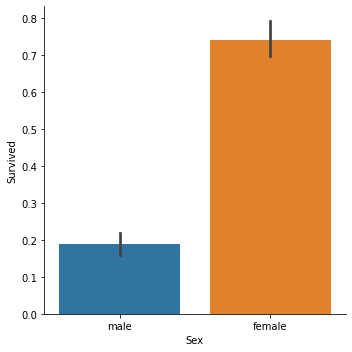

In [40]:

sns.catplot(x="Sex", y="Survived", kind="bar", data=clean_titan_df)


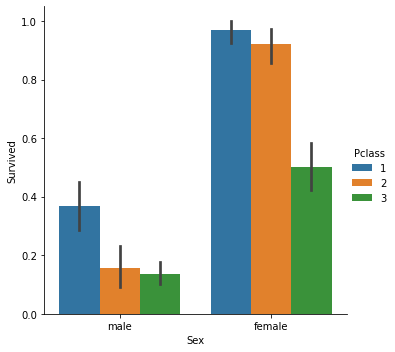

In [41]:
# Shows survival rate is higher in females than in males
# Shows that Class 1 has the most number of survival for both male and female, followed by class 2
# The least survivors are males who belong to Class 3; This is similar with females who belong to Class 3

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=clean_titan_df)



In [42]:

table = pd.pivot_table(clean_titan_df,index=['Sex'], aggfunc={'Age':np.mean, 'Fare':np.mean, 'Survived':np.sum})
table



,Age,Fare,Survived
Sex,,,
female,28.000000,44.479818,233
male,30.820052,25.523893,109


In [43]:
# Table below shows us the mean of each Sex (male and female), Passenger Class (1,2,3) and the number of those who survived in each group

table = pd.pivot_table(clean_titan_df,index=['Sex','Pclass'], aggfunc={'Age':np.mean, 'Fare':np.mean, 'Survived':np.sum})
table




Age        Fare  Survived
Sex    Pclass                                 
female 1       34.095745  106.125798        91
       2       28.756579   21.970121        70
       3       23.621528   16.118810        72
male   1       39.683770   67.226127        45
       2       30.845648   19.741782        17
       3       27.695735   12.661633        47

### Survival Rate and (Age and Pclass)

In [44]:
# different aggregate functions
table = pd.pivot_table(clean_titan_df,index=['Sex','Pclass'],aggfunc={'Age':np.mean,'Survived':np.sum})
table


Age  Survived
Sex    Pclass                     
female 1       34.095745        91
       2       28.756579        70
       3       23.621528        72
male   1       39.683770        45
       2       30.845648        17
       3       27.695735        47

In [45]:
pd.pivot_table(clean_titan_df, index='Status', values=['Age'])

,Age
Status,
Alive,28.463947
Dead,30.674863


<AxesSubplot:xlabel='Survived', ylabel='count'>

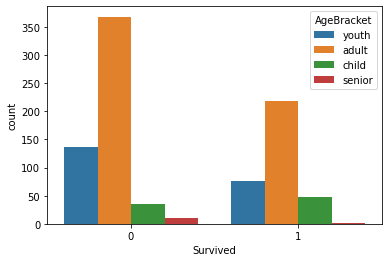

In [46]:
sns.countplot(x='Survived', data=clean_titan_df, hue='AgeBracket')
